# Phonon Calculation

To use this feature, make sure you have installed Phonopy: https://phonopy.github.io/phonopy/

In [1]:
import mdapy as mp
from mdapy.phonon import Phonon
mp.__version__

'1.0.0a1'

### Build a unitcell and relax it using NEP model

In [2]:
Al = mp.build_crystal("Al", "fcc", 4.05)

In [3]:
Al.calc = mp.NEP("../../tests/input_files/UNEP-v1.txt")

In [4]:
fy = mp.FIRE(Al, optimize_cell=True)
fy.run(100)

  Step          Energy            fmax        pressure
     0      -14.965581        0.040863       -0.002461
     1      -14.965630        0.038489       -0.002318
     2      -14.965716        0.033869       -0.002041
     3      -14.965820        0.027260       -0.001643
     4      -14.965917        0.019029       -0.001148
     5      -14.965986        0.009643       -0.000582
     6      -14.966009        0.000360        0.000022
     7      -14.966008        0.002114       -0.000128
     8      -14.966008        0.002051       -0.000124
     9      -14.966008        0.001957       -0.000118
    10      -14.966009        0.001835       -0.000111
    11      -14.966009        0.001685       -0.000102
    12      -14.966009        0.001511       -0.000091
    13      -14.966009        0.001314       -0.000079
    14      -14.966009        0.001098       -0.000066
    15      -14.966009        0.000865       -0.000052
    16      -14.966009        0.000619       -0.000037
    17    

### Initialize a Phonon object

In [5]:
pho = Phonon(
        path="0.0 0.0 0.0 0.5 0.0 0.5 0.625 0.25 0.625 0.375 0.375 0.75 0.0 0.0 0.0 0.5 0.5 0.5",
        labels="$\\Gamma$ X U K $\\Gamma$ L",
        unitcell=Al,
        symprec=1e-3,
    )

### Calculate band structure

In [6]:
pho.compute_band_structure()

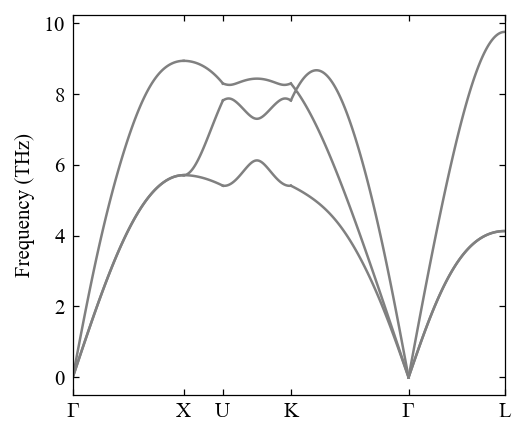

In [7]:
fig, ax = mp.set_figure(figdpi=150)
fig, ax = pho.plot_band_structure(fig, ax)

### Calculate dos and pdos

In [8]:
pho.compute_dos()
pho.compute_pdos()

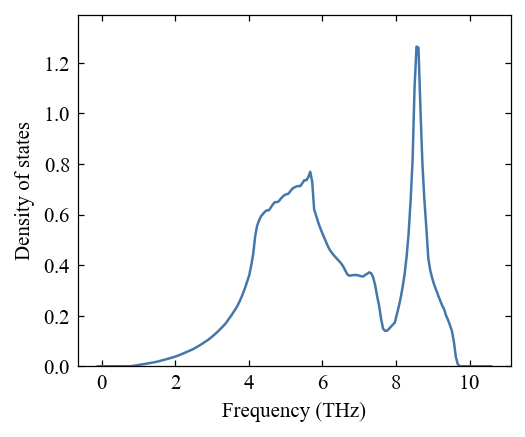

In [9]:
fig, ax = mp.set_figure(figdpi=150)
_ = pho.plot_dos(fig, ax)

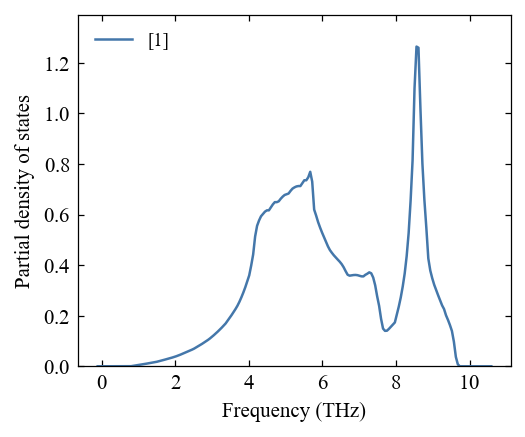

In [10]:
fig, ax = mp.set_figure(figdpi=150)
_ = pho.plot_pdos(fig, ax)

### Calculate thermal properties

In [11]:
pho.compute_thermal(300, 100, 1000)

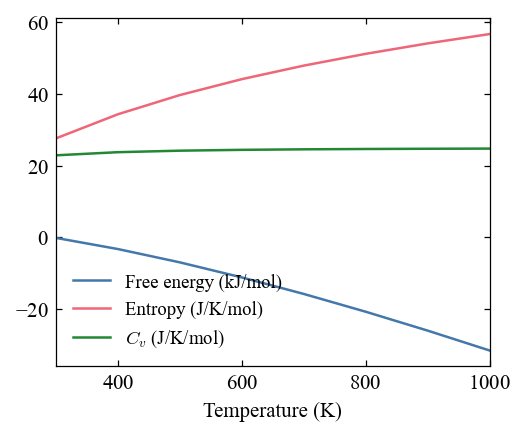

In [12]:
fig, ax = mp.set_figure(figdpi=150)
_ = pho.plot_thermal(fig, ax)

### Use EAM potential

We first generate a EAM file: Al.eam.alloy

In [13]:
_ = mp.EAMGenerator(['Al'])

In [14]:
eam = mp.EAM('Al.eam.alloy')

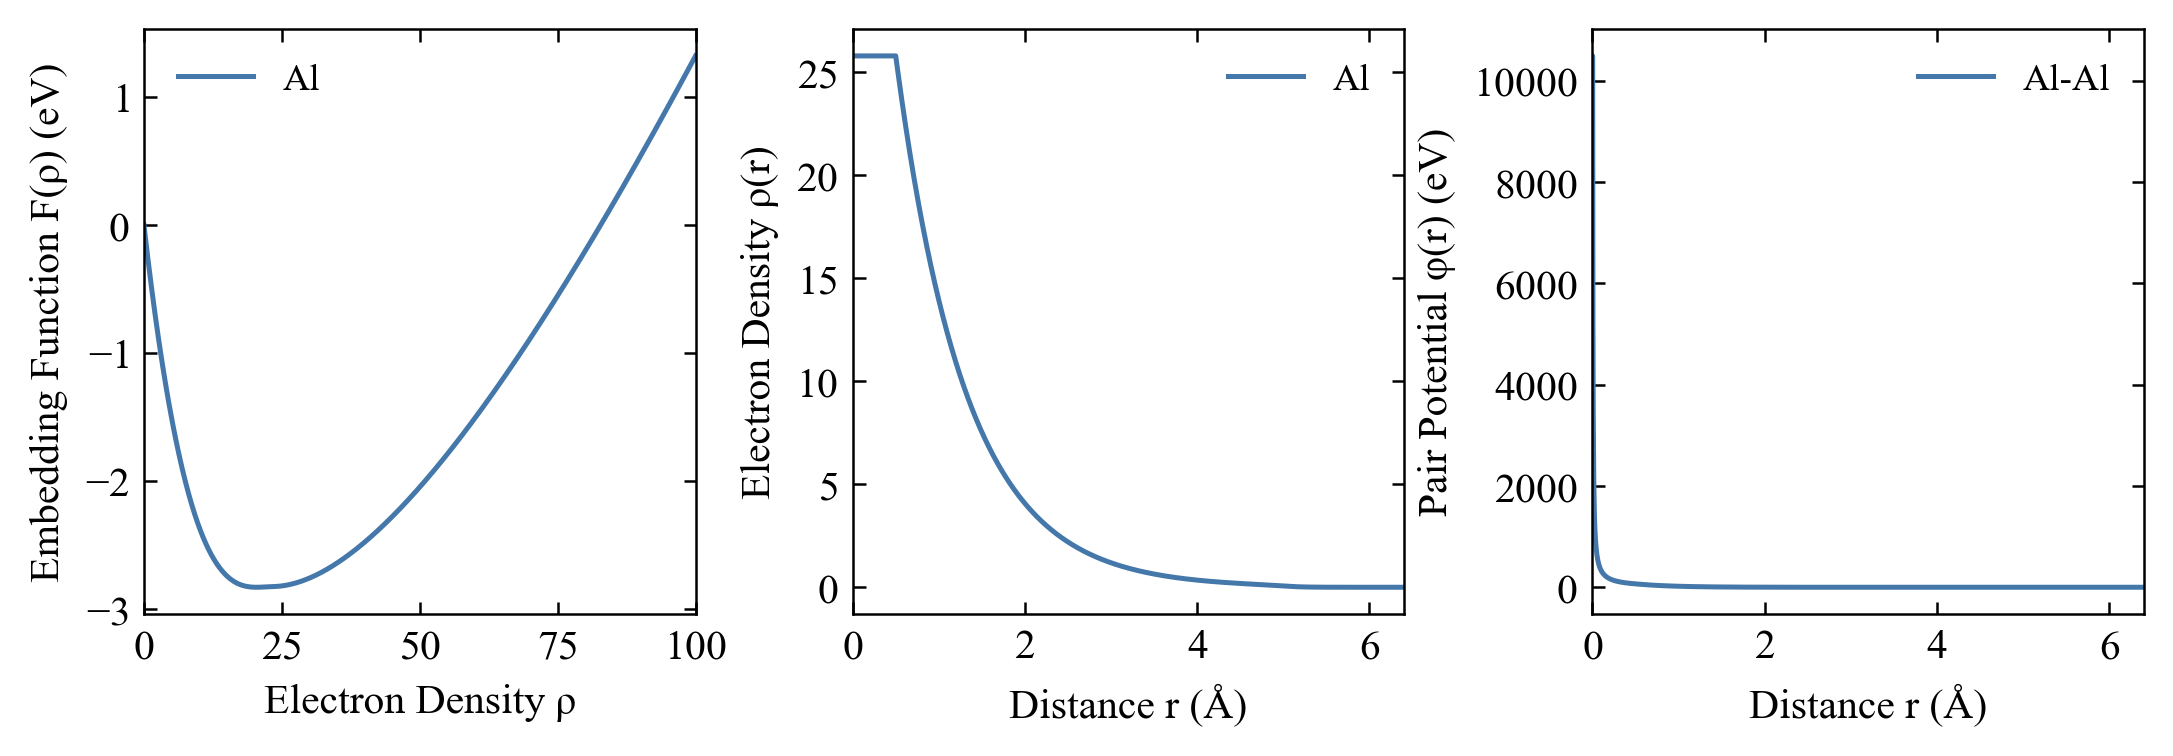

In [15]:
fig, ax = eam.plot()

In [16]:
Al = mp.build_crystal("Al", "fcc", 4.05)
Al.calc = eam
fy = mp.FIRE(Al, optimize_cell=True)
fy.run(100)

  Step          Energy            fmax        pressure
     0      -14.320009        0.001166        0.000070
     1      -14.320009        0.001097        0.000066
     2      -14.320009        0.000964        0.000058
     3      -14.320009        0.000773        0.000047
     4      -14.320009        0.000537        0.000032
     5      -14.320009        0.000269        0.000016
     6      -14.319916        0.000262        0.000016
     7      -14.319916        0.000037       -0.000002


In [17]:
pho = Phonon(
        path="0.0 0.0 0.0 0.5 0.0 0.5 0.625 0.25 0.625 0.375 0.375 0.75 0.0 0.0 0.0 0.5 0.5 0.5",
        labels="$\\Gamma$ X U K $\\Gamma$ L",
        unitcell=Al,
        symprec=1e-3,
    )

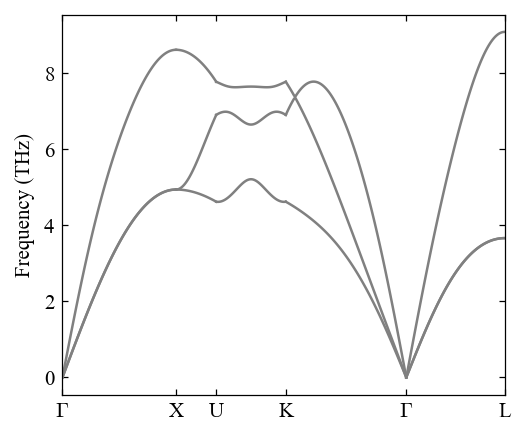

In [18]:
pho.compute_band_structure()
fig, ax = mp.set_figure(figdpi=150)
fig, ax = pho.plot_band_structure(fig, ax)

### Use Lammps potential

To use this feature, make sure you have installed lammps python package.

In [19]:
from mdapy.lammps_potential import LammpsPotential
eam = LammpsPotential(
    pair_parameter="""
    pair_style eam/alloy
    pair_coeff * * Al.eam.alloy Al
    """,
    element_list=['Al']
)

In [20]:
Al = mp.build_crystal("Al", "fcc", 4.05)
Al.calc = eam
fy = mp.FIRE(Al, optimize_cell=True)
fy.run(100)

  Step          Energy            fmax        pressure
     0      -14.320009        0.001164        0.000070
     1      -14.320009        0.001096        0.000066
     2      -14.320009        0.000962        0.000058
     3      -14.320009        0.000772        0.000046
     4      -14.320009        0.000536        0.000032
     5      -14.320009        0.000268        0.000016
     6      -14.319916        0.000264        0.000016
     7      -14.319916        0.000035       -0.000002


In [21]:
pho = Phonon(
        path="0.0 0.0 0.0 0.5 0.0 0.5 0.625 0.25 0.625 0.375 0.375 0.75 0.0 0.0 0.0 0.5 0.5 0.5",
        labels="$\\Gamma$ X U K $\\Gamma$ L",
        unitcell=Al,
        symprec=1e-3,
    )

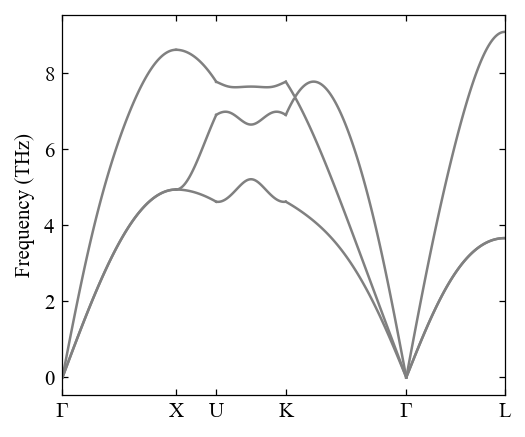

In [22]:
pho.compute_band_structure()
fig, ax = mp.set_figure(figdpi=150)
fig, ax = pho.plot_band_structure(fig, ax)

In [23]:
!rm Al.eam.alloy